In [1]:
import sys
from os import getenv
sys.path.append(getenv("DEVENV_ROOT"))

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum
import greenflow.analysis as an
from entrypoint import load_gin
from greenflow.utils import convert_to_mib
import qgridnext as qgrid

cutoff_begin = "2025-01-11T06:15:35.626996+01:00"
cutoff_end = pendulum.now().to_iso8601_string()
# cutoff_end = "2025-02-12T14:10:59.432181+01:00"
print(cutoff_end)

load_gin(exp_name="ingest-kafka", test=False)

2025-02-14T17:14:07.259352+01:00


[WARNING]: failed to patch stdout/stderr for fork-safety: 'OutStream' object
has no attribute 'buffer'
[WARNING]: failed to reconfigure stdout/stderr with custom encoding error
handler: 'OutStream' object has no attribute 'reconfigure'


In [2]:
def plot_throughput_vs_replicas(enriched_data: pd.DataFrame):
    redpanda_df = enriched_data[enriched_data["exp_name"] == "ingest-redpanda"]
    kafka_df = enriched_data[enriched_data["exp_name"] == "ingest-kafka"]
    # sns.barplot(data=enriched_data, x='broker_replicas', y='throughput_MBps', hue='System')
    sns.lineplot(data=enriched_data, x='broker_replicas', y='throughput_MBps', hue='System')
    # plt.title('Throughput vs Brokers (Kafka - HDD)')
    plt.xlabel('Brokers')
    plt.ylabel('Data Throughput (MBps)')
    plt.grid(True)
    sns.despine()
    plt.show()
    # sns.boxplot(data=kafka_df, x='broker_replicas', y='throughput_MBps')


In [3]:
df = an.full_analytical_pipeline(
    cutoff_begin=cutoff_begin,
    cutoff_end=cutoff_end,
    # exp_name="ingest-kafka",
    cluster=".*",
    # cluster="grappe",
    # type="scalingBehaviour",
    type=".*",
    load=10**9,
    replicationFactor=3,
)
system_mapping = {
    'ingest-kafka': 'Kafka',
    'ingest-redpanda': 'Redpanda'
}
cluster_mapping = {
    'ovhnvme': 'ADVANCE',
    'taurus': 'Taurus',
    'grappe': 'Grappe',
    'ecotype': 'Ecotype',
    'parasilo': 'Parasilo',
}
# ovhnvme = ovhnvme.copy()
df['System'] = df['exp_name'].map(system_mapping)
df['Cluster'] = df['cluster'].map(cluster_mapping)
df = df[~((df['System'] == 'Redpanda') & (df['Cluster'] == 'Taurus'))]
df = df.dropna()
df = df[df['partitions'] == df['broker_replicas'] * 10]
df = df[df['System'] == 'Kafka']
# taurus_kafka = an.full_analytical_pipeline(
#     cutoff_begin=cutoff_begin, cutoff_end=cutoff_end, exp_name="ingest-kafka", cluster="taurus", type="scalingBehaviour", partitions=120,
# )

an.create_qgrid_widget(df)

Error in row 67af6b00322d3855462af679 for calculate_energy_cost:
Error message: local variable 'idle_power_base' referenced before assignment
Row data:
{'broker_cpu': 8, 'broker_mem': '16Gi', 'broker_replicas': 6, 'cluster': 'parasilo', 'consumer_instances': 10, 'duration': 151.47557, 'durationSeconds': 100, 'exp_name': 'ingest-kafka', 'latency_p99': 0.0049530574428659655, 'load': 1000000000.0, 'messageSize': 32, 'num_broker_nodes': 8, 'observed_throughput': 8715300.23, 'partitions': 60, 'producer_instances': 10, 'replicationFactor': 3, 'started_ts': '2025-02-14T17:08:09.359878+01:00', 'stopped_ts': '2025-02-14T17:10:40.835448+01:00', 'average_power': 515.7304711, 'throughput_MBps': 265.9698556518555, 'adjusted_network_throughput': 1101.1152023986815}
Error in row 67af6a69322d3855462af677 for calculate_energy_cost:
Error message: local variable 'idle_power_base' referenced before assignment
Row data:
{'broker_cpu': 8, 'broker_mem': '16Gi', 'broker_replicas': 6, 'cluster': 'parasilo', '

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

<Axes: xlabel='broker_replicas', ylabel='adjusted_network_throughput'>

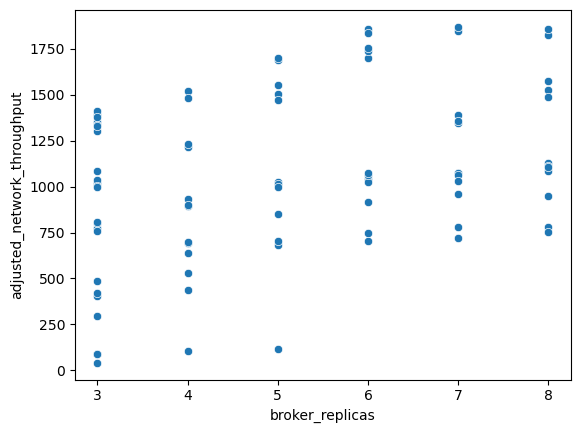

In [4]:
sns.scatterplot(
    df,
    x='broker_replicas',
    y='adjusted_network_throughput',)

In [5]:
# a = df.copy()
# a.drop(
#     [
#         "exp_name",
#         "cluster",
#         # "broker_replicas",
#         "broker_cpu",
#         "broker_mem",
#         "producer_instances",
#         "consumer_instances",
#         "duration",
#         "durationSeconds",
#         "latency_p99",
#         "load",
#         "messageSize",
#         "num_broker_nodes",
#         "partitions",
#         "replicationFactor",
#         # "throughput_per_watt",
#         "energy_cost",
#         "network_saturation",
#         "average_power",
#         "started_ts",
#         "stopped_ts",
#         "observed_throughput",

#     ],
#     axis=1,
#     inplace=True,
# )
# an.create_qgrid_widget(a)
# print(a.to_csv(index=False))

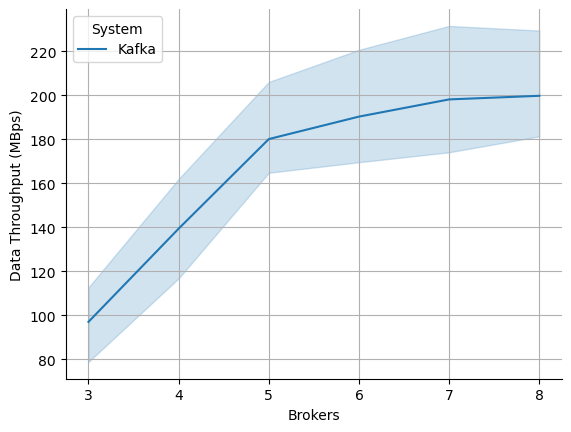

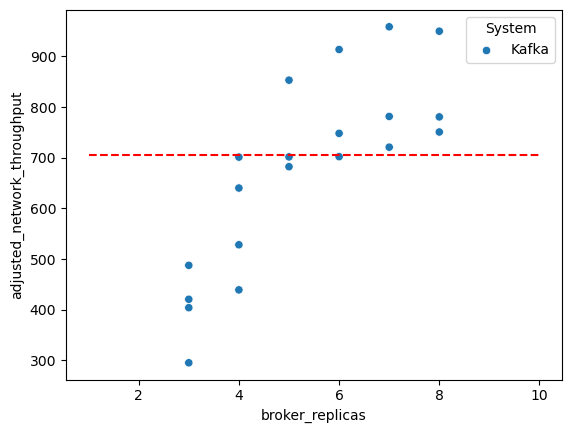

In [6]:
plot_throughput_vs_replicas(df[df['Cluster'] == 'Taurus'])
ax = sns.scatterplot(
    df[df["Cluster"] == "Taurus"],
    x="broker_replicas",
    y="adjusted_network_throughput",
    hue="System",
)
ax.hlines(352.5*2, 1, 10, colors="red", linestyles="--")
plt.show()

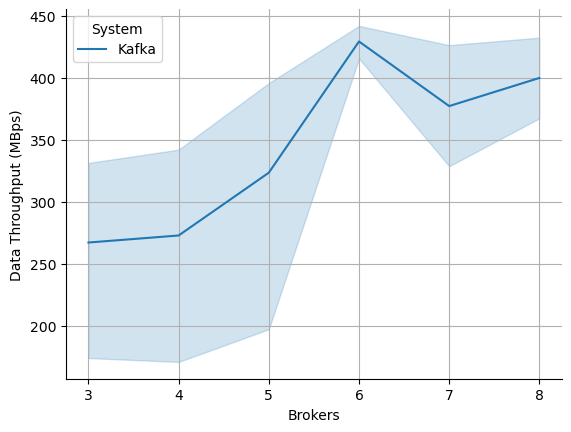

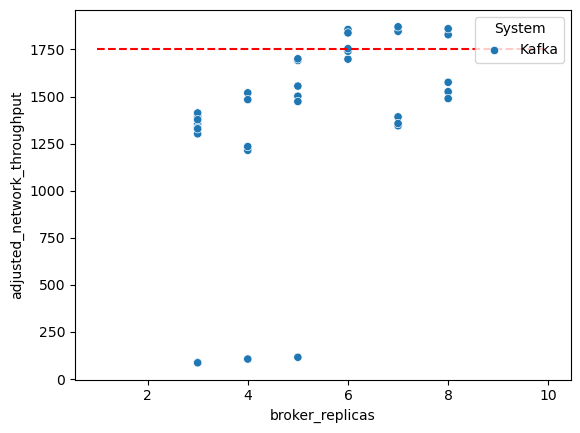

In [7]:
plot_throughput_vs_replicas(df[df["Cluster"] == "Grappe"])
ax = sns.scatterplot(
    df[df["Cluster"] == "Grappe"],
    x="broker_replicas",
    y="adjusted_network_throughput",
    hue="System",
)
ax.hlines(875*2, 1, 10, colors="red", linestyles="--")
plt.show()

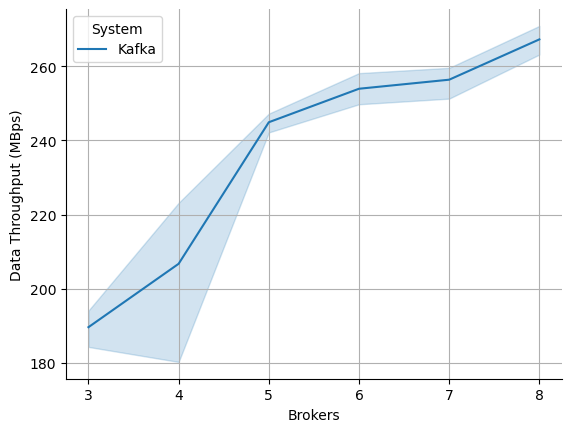

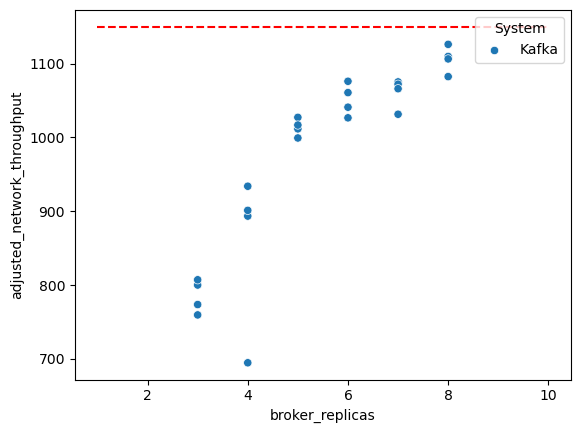

In [8]:
plot_throughput_vs_replicas(df[df['Cluster'] == 'Ecotype'])
ax = sns.scatterplot(
    df[df["Cluster"] == "Ecotype"],
    x="broker_replicas",
    y="adjusted_network_throughput",
    hue="System",
)
ax.hlines(575*2, 1, 10, colors="red", linestyles="--")

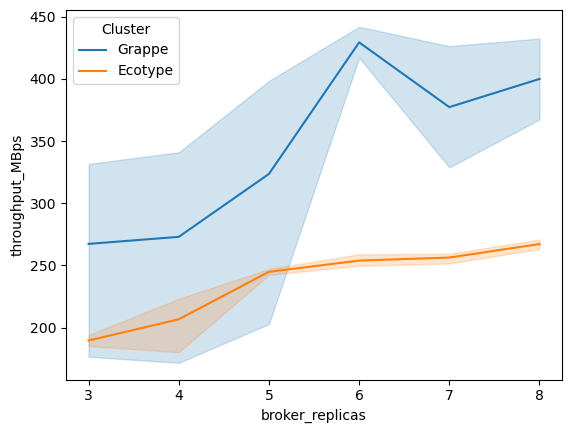

In [9]:
kafka_df = df[df['System'] == 'Kafka']
kafka_df = kafka_df[((kafka_df['Cluster'] == 'Ecotype') | (kafka_df['Cluster'] == 'Grappe'))]
ax = sns.lineplot(
    kafka_df,
    x='broker_replicas',
    y='throughput_MBps',
    hue="Cluster",
    )
# ax.hlines(100, 0, 10, colors='r', linestyles='dashed')